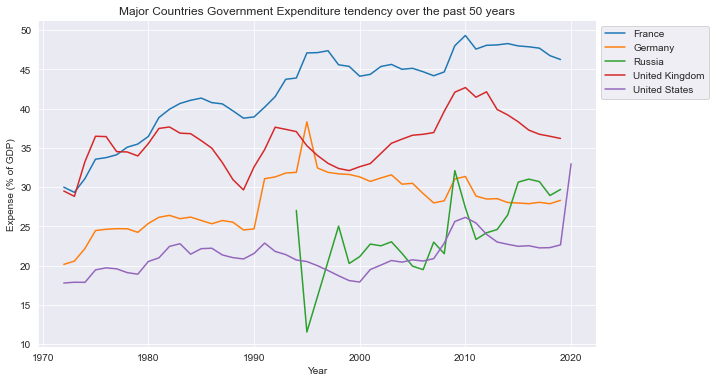

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import seaborn as sns

# Load data into a pandas DataFrame
gov_expenditure_df = pd.read_csv('data/total-gov-expenditure-gdp-wdi.csv')
inequality_df = pd.read_csv("data/tax-reduction-in-income-inequality.csv")

# Group data by entity
countries = ['Japan', 'Germany', 'Russia', 'United Kingdom', 'United States', 'France']
gov_expenditure_df = gov_expenditure_df[gov_expenditure_df['Entity'].isin(countries)]

grouped_data = gov_expenditure_df.groupby('Entity')

#Select Countries

fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each entity and plot its data
for name, group in grouped_data:
    sns.lineplot(x='Year', y='Expense (% of GDP)', data=group, label=name)

# Add axis labels and legend

plt.xlabel('Year')
plt.ylabel('Expense (% of GDP)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
ax.set_title('Major Countries Government Expenditure tendency over the past 50 years')
sns.despine()


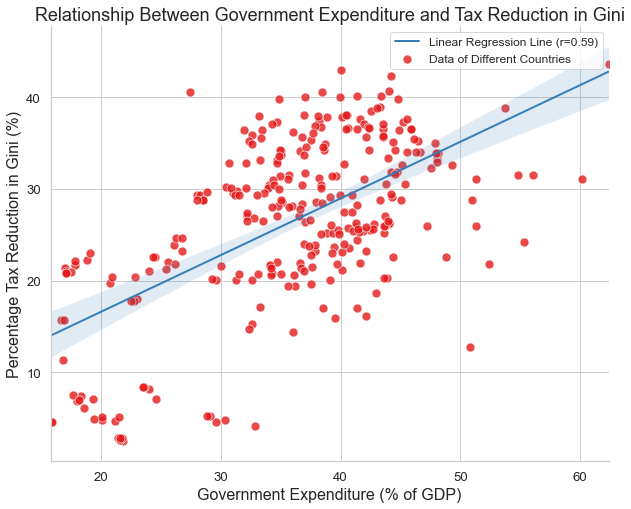

Correlation coefficient: 0.59


In [4]:
# Load data into a pandas DataFrame
gov_expenditure_df = pd.read_csv('data/total-gov-expenditure-gdp-wdi.csv')
inequality_df = pd.read_csv("data/tax-reduction-in-income-inequality.csv")

# Merge data together
merged_df = pd.merge(inequality_df, gov_expenditure_df, on=["Entity", "Code", "Year"])

# Calculate correlation coefficient
corr_matrix = merged_df[["Percentage reduction in Gini (OECD (2019))", "Expense (% of GDP)"]].corr()

# Perform linear regression
x = merged_df["Expense (% of GDP)"]
y = merged_df["Percentage reduction in Gini (OECD (2019))"]
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Set color palette
colors = sns.color_palette("Set1")

# Create scatter plot
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=x, y=y, color=colors[0], s=80, alpha=0.8)
sns.regplot(x=x, y=y, color=colors[1], scatter_kws={"s": 0}, line_kws={"lw": 2})
plt.xlabel("Government Expenditure (% of GDP)", fontsize=16)
plt.ylabel("Percentage Tax Reduction in Gini (%)", fontsize=16)
plt.title("Relationship Between Government Expenditure and Tax Reduction in Gini", fontsize=18)
plt.legend([ f"Linear Regression Line (r={r_value:.2f})","Data of Different Countries"], loc="upper right", fontsize=12)
sns.despine()
plt.show()

# Display correlation coefficient
print(f"Correlation coefficient: {corr_matrix.iloc[0,1]:.2f}")

Gini Coefficient Definition: The Gini coefficient is a measure of income or wealth distribution within a population. It is a number between 0 and 1, where 0 represents perfect equality (everyone has the same income or wealth), and 1 represents perfect inequality (one person has all the income or wealth, while everyone else has nothing).

The graph shown above shows a tendency that: when countries have more government expenditure, Gini reduction is higher. This means that more taxes are tend to be transfered to lowest income people. To conclude, when countries have more government expenditure, the countries inequality in after-tax revenue will become less. According to a OECD analysis: http://dx.doi.org/10.1787/5jxrjncwxv6j-en , inequality will hurt economic growth, so reducing inequality will help booster the economic growth for countries.



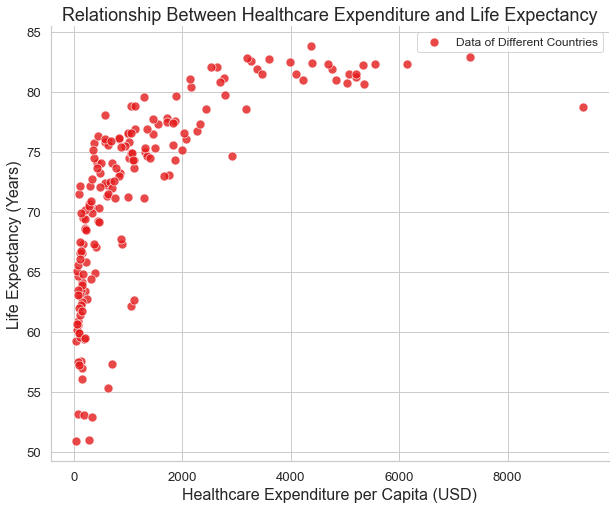

Correlation coefficient: 0.68


In [7]:
# Load data into a pandas DataFrame
life_expectancy_vs_healthcare_expenditure_df = pd.read_csv('data/life-expectancy-vs-healthcare-expenditure.csv')

# Drop any rows with missing values
life_expectancy_vs_healthcare_expenditure_df.dropna(inplace=True)
df = life_expectancy_vs_healthcare_expenditure_df[['Life expectancy at birth, total (years)', 'Current health expenditure per capita, PPP (current international $)']]

# Set color palette
colors = sns.color_palette("Set1")

# Create scatter plot
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df, x='Current health expenditure per capita, PPP (current international $)', y='Life expectancy at birth, total (years)', color=colors[0], s=80, alpha=0.8)
plt.xlabel('Healthcare Expenditure per Capita (USD)', fontsize=16)
plt.ylabel('Life Expectancy (Years)', fontsize=16)
plt.title('Relationship Between Healthcare Expenditure and Life Expectancy', fontsize=18)
plt.legend(["Data of Different Countries"], loc="upper right", fontsize=12)
sns.despine()
plt.show()

# Display correlation coefficient
corr = df.corr()
print(f"Correlation coefficient: {corr.iloc[0,1]:.2f}")

 From this graph, we can see there is a positive relationship between healthcare expenditure and life expectancy: countries that spend more on healthcare generally having higher life expectancies. The correlation coefficient between the two variables is 0.68, which indicates a moderately strong positive correlation.

This plot can be used to illustrate how increased government spending on healthcare can lead to longer life expectancies, which in turn can lead to a healthier and more productive population, and ultimately, a stronger economy.

In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

In [4]:
data = pd.read_csv("CO2_total.csv")
data.columns=[(i.split())[0] for i in data.columns]

In [5]:
df=data[~data.isin(['..']).any(axis=1)]
df=df.set_index('Country')
df[df.columns]=df[df.columns].astype(float)

In [6]:
df=df.sort_values(by=['2019'], ascending=False)

In [7]:
total_co2=sum(df['2019'])
countries=[]
#top_data=[]
ratio=0
co2_emis=0
i=0
while ratio<0.7:
    countries.append(df.index[i])
    #top_data.append(df['2019'][i])
    co2_emis+=df['2019'][i]
    i+=1
    ratio=co2_emis/total_co2
    #adjust order
temp=countries[0]
countries[0]=countries[1]
countries[1]=countries[3]
countries[3]=temp
top_data=df['2019'][countries].to_numpy()
top_df=df[df.index.isin(countries)].transpose()
top_df.index=top_df.index.astype(int)

In [8]:
piedata=top_data
pielabel=countries
piedata=np.append(top_data,(total_co2-sum(top_data)))
pielabel.append("Rest")

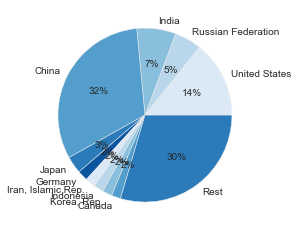

<Figure size 432x288 with 0 Axes>

In [9]:
palette_color = sns.color_palette("Blues")#sns.color_palette("mako", as_cmap=True)
plt.pie(piedata, labels=countries, colors=palette_color, autopct='%.0f%%')
# displaying chart
plt.show()
plt.savefig("fig1_pie.png")

From the above pie figure, we can observe that top 10 countries accounts for more than 70% of total CO2 emission. In the following part we will mainly analyze the relaship between CO2 emission and government spending of these countries.


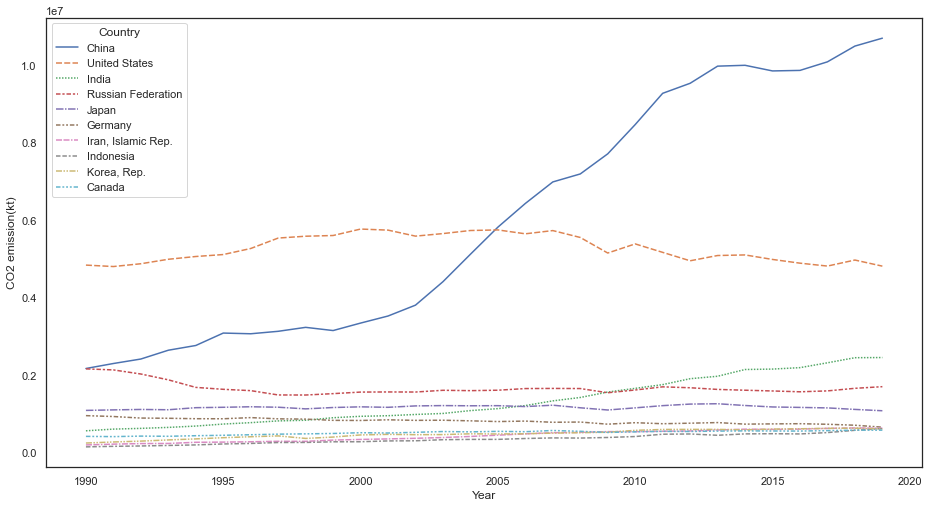

In [11]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.set_style(style='white')
ax = sns.lineplot(data=top_df)
ax.set(ylabel='CO2 emission(kt)', xlabel='Year')
plt.savefig("fig2_total.png")

Among these countries, developed countries are emitting equal or less CO2 than previous, while developing countries are emiting more.

In [12]:
co2perdata = pd.read_csv("CO2_perGDP.csv")
co2perdata.columns=[(i.split())[0] for i in co2perdata.columns]
df2=co2perdata[~co2perdata.isin(['..']).any(axis=1)]
df2=df2.set_index('Country')
df2[df2.columns]=df2[df2.columns].astype(float)

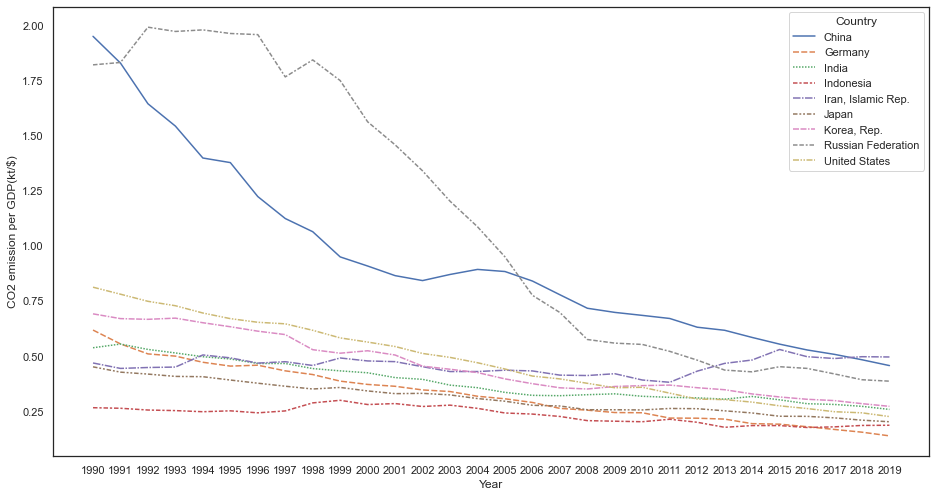

In [13]:
top_df2=df2[df2.index.isin(countries)].transpose()
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.set_style(style='white')
ax = sns.lineplot(data=top_df2)
ax.set(ylabel='CO2 emission per GDP(kt/$)', xlabel='Year')
plt.savefig("fig3_perGDP.png")

Though developing countries are emiting more CO2 in amount, CO2 per GDP is decreasing for most of countries, which shows a growing awerness of enviromental protection.

In [14]:
from sklearn.linear_model import LinearRegression
#process spending data
data = pd.read_csv("spending.csv")
data.columns=[(i.split())[0] for i in data.columns]
df_spending=data[~data.isin(['..']).any(axis=1)]
df_spending=df_spending.set_index('Country')
df_spending[df_spending.columns]=df_spending[df_spending.columns].astype(float)

In [15]:
df_topspending=df_spending[df_spending.index.isin(countries)].transpose()
coef_list=np.zeros(9)
for i in range(9):
    y=df_topspending[countries[i]].to_numpy()
    X=top_df2[countries[i]].to_numpy()
    X=X.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    coef_list[i]=reg.coef_[0]

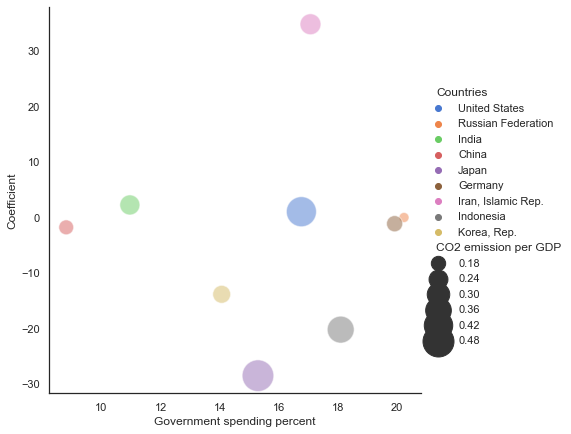

In [16]:
spending_list=(df_topspending.loc[:,(df_topspending.columns).isin(countries[:9])].tail(1).to_numpy())[0]
emission_list=(top_df2.loc[:,(top_df2.columns).isin(countries[:9])].tail(1).to_numpy())[0]
point_df=(pd.DataFrame([emission_list,coef_list,spending_list,countries[:9]])).transpose()
point_df.columns = ["CO2 emission per GDP","Coefficient","Government spending percent","Countries"]
sns.set_style(style='white')
sns.relplot(x="Government spending percent", y="Coefficient", hue="Countries", size="CO2 emission per GDP",
            sizes=(100, 1000), alpha=.5, palette="muted",
            height=6, data=point_df)


We perform linear regression between CO2 emission per GDP and Government spending percent, and shows the figure above. The y-axis shows the coefficient in linear regression. The higher it is, the more CO2 emission will be when Government spending percent increase. The size of points represent the CO2 emission per GDP, the bigger the size is, the larger emission will be.
From this graph, we can observe that for devoloped countries like Japan and Korea, their CO2 emission per GDP decrease when Government spending increase. While, for developing countries like Iran,their CO2 emission per GDP increases when Government spending increase. For other countries, CO2 emission per GDP almost remain unchanged when Government spending increase.

In [35]:
import pandas as pd
import collections as cTools
import itertools as iTools
import numpy as np
import plotly.graph_objects as go
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [36]:
# Read all data

investment = pd.read_csv(r'investment.csv')
maintenance = pd.read_csv(r'maintenance.csv')
goodsTransport = pd.read_csv(r'goodsTransport.csv')

In [37]:
# Filter countries

g20Countries = [
    'Canada',
    'France',
    'India',
    'Italy',
    'Japan',
    'Mexico',
    'Korea',
    'Türkiye',
    'United Kingdom',
    'United States',
]
# Road way data Investment manipulation

investSeries = investment[investment['VARIABLE']=='I-INV-RD']
investSeries = investSeries.drop(columns=['COUNTRY','Variable','Measure','MEASURE','YEAR','Unit Code','Unit','PowerCode Code','PowerCode'])
investSeries = investSeries.drop(columns = ['Reference Period Code','Reference Period','Flag Codes','Flags','VARIABLE'])
mask = investSeries['Country'].str.contains('Moldova') | investSeries['Country'].str.contains('Netherlands') | investSeries['Country'].str.contains('Albania')
investSeries = investSeries[~mask]
investSeries['Country'] = pd.Categorical(investSeries['Country'])
investSeries.set_index('Country')
investSeries = investSeries.pivot_table(index='Country', columns='Year', values='Value', aggfunc='first')
investSeries = investSeries.apply(pd.to_numeric, errors='coerce')
investSeries.fillna(method='bfill', inplace=True)
investSeries = investSeries.drop(index = 'Montenegro, Republic of')
investSeries = investSeries.iloc[:,::3]
g20InvestSeries = investSeries[investSeries.index.isin(g20Countries)]

print('###########-> g20 Investment Series <- ###############')
print(g20InvestSeries)


###########-> g20 Investment Series <- ###############
Year                    2000          2003          2006          2009  \
Country                                                                  
Canada          5.109000e+09  6.228000e+09  9.653000e+09  1.726300e+10   
France          1.094036e+10  1.099093e+10  1.291532e+10  1.427776e+10   
India           8.930000e+08  1.516000e+09  2.294890e+11  3.232800e+11   
Italy           6.930000e+09  6.874000e+09  1.428000e+10  5.641000e+09   
Japan           7.876816e+12  6.530833e+12  5.343044e+12  4.836705e+12   
Korea           8.000000e+06  9.026000e+12  7.336300e+12  2.162280e+13   
Mexico          1.139820e+10  2.082970e+10  3.487970e+10  5.671750e+10   
Türkiye         5.760000e+08  1.693746e+09  4.151423e+09  7.470630e+09   
United Kingdom  3.391000e+09  3.595000e+09  4.323000e+09  5.850859e+09   
United States   5.658600e+10  6.003800e+10  7.350000e+10  8.270000e+10   

Year                    2012          2015          2018

In [38]:
# Road way Maintenance manipulation

goodsTransport = maintenance[maintenance['VARIABLE']=='I-MTN-RD']
maintenanceSeries = goodsTransport.drop(columns=['COUNTRY','Variable','Measure','MEASURE','YEAR','Unit Code','Unit','PowerCode Code','PowerCode'])
maintenanceSeries = maintenanceSeries.drop(columns = ['Reference Period Code','Reference Period','Flag Codes','Flags','VARIABLE'])
mask = maintenanceSeries['Country'].str.contains('Moldova') | maintenanceSeries['Country'].str.contains('Netherlands')
maintenanceSeries = maintenanceSeries[~mask]
maintenanceSeries['Country'] = pd.Categorical(maintenanceSeries['Country'])
maintenanceSeries.set_index('Country')
maintenanceSeries = maintenanceSeries.pivot_table(index='Country', columns='Year', values='Value', aggfunc='first')
maintenanceSeries = maintenanceSeries.apply(pd.to_numeric, errors='coerce')
maintenanceSeries.fillna(method='ffill', inplace=True)
maintenanceSeries = maintenanceSeries.iloc[:,::3]
g20MaintenanceSeries = maintenanceSeries[maintenanceSeries.index.isin(g20Countries)]

print('###########-> g20 maintenance Series <- ###############')
print(g20MaintenanceSeries)
# Road way export manipulation
goodsTransportSeries = goodsTransport[goodsTransport['VARIABLE']=='T-GOODS-RD-TOT']
goodsTransportSeries = goodsTransportSeries.drop(columns=['COUNTRY','Variable','YEAR','Unit Code','Unit','PowerCode Code','PowerCode'])
goodsTransportSeries = goodsTransportSeries.drop(columns = ['Reference Period Code','Reference Period','Flag Codes','Flags','VARIABLE'])
goodsTransportSeries['Country'] = pd.Categorical(goodsTransportSeries['Country'])
goodsTransportSeries.set_index('Country')
goodsTransportSeries = goodsTransportSeries.pivot_table(index='Country', columns='Year', values='Value', aggfunc='first')
goodsTransportSeries = goodsTransportSeries.apply(pd.to_numeric, errors='coerce')
goodsTransportSeries.fillna(method='ffill', inplace=True)
goodsTransportSeries = goodsTransportSeries.iloc[:,::3]
goodsTransportSeries = goodsTransportSeries.drop(columns=[2021],axis=1)
g20GoodsTransportSeries = goodsTransportSeries[goodsTransportSeries.index.isin(g20Countries)]
print('###########-> g20 Transport load Series <- ###############')
print(g20GoodsTransportSeries)

###########-> g20 maintenance Series <- ###############
Year                    2000          2003          2006          2009  \
Country                                                                  
Canada          8.068000e+09  8.306000e+09  7.707000e+09  1.038400e+10   
France          2.280000e+08  2.390000e+08  2.235000e+09  2.601000e+09   
India           1.789000e+09  2.245000e+09  2.932030e+11  4.206070e+11   
Italy           9.720000e+09  1.159600e+10  1.345200e+10  6.008000e+09   
Japan           2.213095e+12  2.025693e+12  1.719400e+12  1.758697e+12   
Korea           2.213095e+12  2.240700e+12  2.138500e+12  2.488400e+12   
Mexico          4.127000e+09  4.824400e+09  6.452800e+09  1.260370e+10   
Türkiye         6.500000e+07  1.670000e+08  2.840000e+08  8.880000e+08   
United Kingdom  3.120000e+09  3.344000e+09  3.993000e+09  3.863722e+09   
United States   2.397500e+10  2.581600e+10  3.139500e+10  3.220300e+10   

Year                    2012          2015          201

KeyError: 2021

In [39]:
# Finding Correlation between investment and Trade
investTransportCorr = g20InvestSeries.corrwith(g20GoodsTransportSeries, axis=1).sort_values()

print('###########-> Correlation <- ###############')
print(investTransportCorr)

# Finding R squared value

r2Values = []
for i in range(len(g20InvestSeries)):
    slope, intercept, r_value, p_value, std_err = linregress(g20InvestSeries.iloc[i], g20GoodsTransportSeries.iloc[i])
    r2Values.append(r_value ** 2)

print('###########-> Correlation <- ###############')
print(r2Values)

###########-> Correlation <- ###############
Canada           NaN
France           NaN
India            NaN
Italy            NaN
Japan            NaN
Korea            NaN
Mexico           NaN
Türkiye          NaN
United Kingdom   NaN
United States    NaN
dtype: float64


IndexError: single positional indexer is out-of-bounds

In [40]:
# See how maintenance correlates with investment

maintenanceInvestCorr = g20MaintenanceSeries.corrwith(g20InvestSeries, axis=1).sort_values()
print('###########-> Correlation <- ###############')
print(maintenanceInvestCorr)

# see how maintenance correlates with transport

maintenanceTransportCorr = g20MaintenanceSeries.corrwith(g20GoodsTransportSeries, axis=1).sort_values()
print('###########-> Correlation <- ###############')
print(maintenanceTransportCorr)


###########-> Correlation <- ###############
Country
United Kingdom   -0.591404
United States    -0.144197
Türkiye           0.195339
France            0.326236
Canada            0.405705
Japan             0.441285
Korea             0.640722
Italy             0.790761
India             0.854460
Mexico            0.902717
dtype: float64
###########-> Correlation <- ###############
Canada           NaN
France           NaN
India            NaN
Italy            NaN
Japan            NaN
Korea            NaN
Mexico           NaN
Türkiye          NaN
United Kingdom   NaN
United States    NaN
dtype: float64


In [41]:
# Plots of Correlation investment and Trade transport volume
fig = go.Figure(data=go.Scatter(
    x=investTransportCorr.index,
    y=[1] * len(investTransportCorr), # Set y-axis to 1 to plot bubbles along the x-axis
    mode='markers',
    showlegend=False,
    marker=dict(
        size=abs(investTransportCorr)*8,  # Bubble size based on absolute value of correlation, scaled for display
        color=investTransportCorr,            # Bubble color based on correlation
        colorscale='Turbo',          # Choose a color scale (optional)
        sizemode='diameter',
        sizeref=0.1,
        opacity=0.8,
        reversescale=True,
        colorbar=dict(
            title='Correlation'       # Title of the colorbar
        ),
    )
))

# Update the layout with axis titles and chart title
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Y-axis',
    title='Bubble Plot Example'
)

# Find the index of the bubble with the highest and lowest correlation
highest_index = investTransportCorr.idxmax()
lowest_index = investTransportCorr.idxmin()

fig.add_trace(
    go.Scatter(
        x=[highest_index,lowest_index],
        y=[1, 1],
        text=['Highest','Lowest'],
        mode="text",
        textposition="top center",
        textfont=dict(color="white"),
        showlegend=False
    )
)



# Show the chart
fig.show()



ValueError: 
    Invalid element(s) received for the 'size' property of scatter.marker
        Invalid elements include: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [42]:
# Plots of Correlation investment and maintenance volume
fig = go.Figure(data=go.Scatter(
    x=maintenanceInvestCorr.index,
    y=[1] * len(maintenanceInvestCorr), # Set y-axis to 1 to plot bubbles along the x-axis
    mode='markers',
    showlegend=False,
    marker=dict(
        size=abs(maintenanceInvestCorr)*8,  # Bubble size based on absolute value of correlation, scaled for display
        color=maintenanceInvestCorr,            # Bubble color based on correlation
        colorscale='Turbo',          # Choose a color scale (optional)
        sizemode='diameter',
        sizeref=0.1,
        opacity=0.8,
        reversescale=True,
        colorbar=dict(
            title='Correlation'       # Title of the colorbar
        ),
    )
))

# Update the layout with axis titles and chart title
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Y-axis',
    title='Bubble Plot Example'
)

# Find the index of the bubble with the highest and lowest correlation
highest_index = maintenanceInvestCorr.idxmax()
lowest_index = maintenanceInvestCorr.idxmin()

fig.add_trace(
    go.Scatter(
        x=[highest_index,lowest_index],
        y=[1, 1],
        text=['Highest','Lowest'],
        mode="text",
        textposition="top center",
        textfont=dict(color="white"),
        showlegend=False
    )
)



# Show the chart
fig.show()



In [43]:
# Plots of maintenance investment and Trade transport volume
fig = go.Figure(data=go.Scatter(
    x=maintenanceTransportCorr.index,
    y=[1] * len(maintenanceTransportCorr), # Set y-axis to 1 to plot bubbles along the x-axis
    mode='markers',
    showlegend=False,
    marker=dict(
        size=abs(maintenanceTransportCorr)*8,  # Bubble size based on absolute value of correlation, scaled for display
        color=maintenanceTransportCorr,            # Bubble color based on correlation
        colorscale='Turbo',          # Choose a color scale (optional)
        sizemode='diameter',
        sizeref=0.1,
        opacity=0.8,
        reversescale=True,
        colorbar=dict(
            title='Correlation'       # Title of the colorbar
        ),
    )
))

# Update the layout with axis titles and chart title
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Y-axis',
    title='Bubble Plot Example'
)

# Find the index of the bubble with the highest and lowest correlation
highest_index = maintenanceTransportCorr.idxmax()
lowest_index = maintenanceTransportCorr.idxmin()

fig.add_trace(
    go.Scatter(
        x=[highest_index,lowest_index],
        y=[1, 1],
        text=['Highest','Lowest'],
        mode="text",
        textposition="top center",
        textfont=dict(color="white"),
        showlegend=False
    )
)



# Show the chart
fig.show()



ValueError: 
    Invalid element(s) received for the 'size' property of scatter.marker
        Invalid elements include: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above